<a href="https://colab.research.google.com/github/Ayushmishra1503/online-retail-customer/blob/main/online_retail_customer_segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation



##### **Project Type**    -Unsupervised
##### **Contribution**    - Ayush Mishra (Individual)

# **Project Summary -**

The project focuses on a UK-based non-store online retail business that specializes in unique all-occasion gifts. The goal is to uncover the major customer segments of the business using a transaction data set that contains information on customer transactions, such as invoice number, product code, description, quantity, invoice date, unit price, customer ID, and country. By analyzing this data, we aim to identify different customer segments based on their purchasing behavior and characteristics, such as demographics, purchasing frequency, and average spend. The insights gained from this analysis can help the business optimize its marketing and sales strategies to better serve its customers, ultimately improving customer satisfaction and increasing revenue.

# **GitHub Link -**

https://github.com/Ayushmishra1503/online-retail-customer

# **Problem Statement**


The objective of this project is to analyze the transaction data of a UK-based non-store online retail business that specializes in unique all-occasion gifts and identify the major customer segments based on their purchasing behavior and characteristics. The data set includes information on invoice number, product code, description, quantity, invoice date, unit price, customer ID, and country. The goal is to gain insights into the different customer segments, their behavior, and their needs, in order to optimize the business's marketing and sales strategies. This analysis can help the business better understand its customers and tailor its offerings to their preferences and needs.

**Data Description**

**Attribute Information:**

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
import missingno as msno
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_excel('/content/Online Retail.xlsx')

### Dataset First View

In [3]:
# Displaying the first 5 rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### Dataset Information

In [6]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Our dataset has 541909 rows and 8 columns, but we have missing information in two of the columns. The CustomerID column has 406829 values, meaning that some information is missing. The same is true for the Description column. It's important to keep in mind these missing values when analyzing our dataset.

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(f"Number of duplicated rows in dataset: {df.duplicated().sum()}")

Number of duplicated rows in dataset: 5268


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(f"Number of null values rows in dataset{df.isnull().sum()}")

Number of null values rows in datasetInvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


<Axes: >

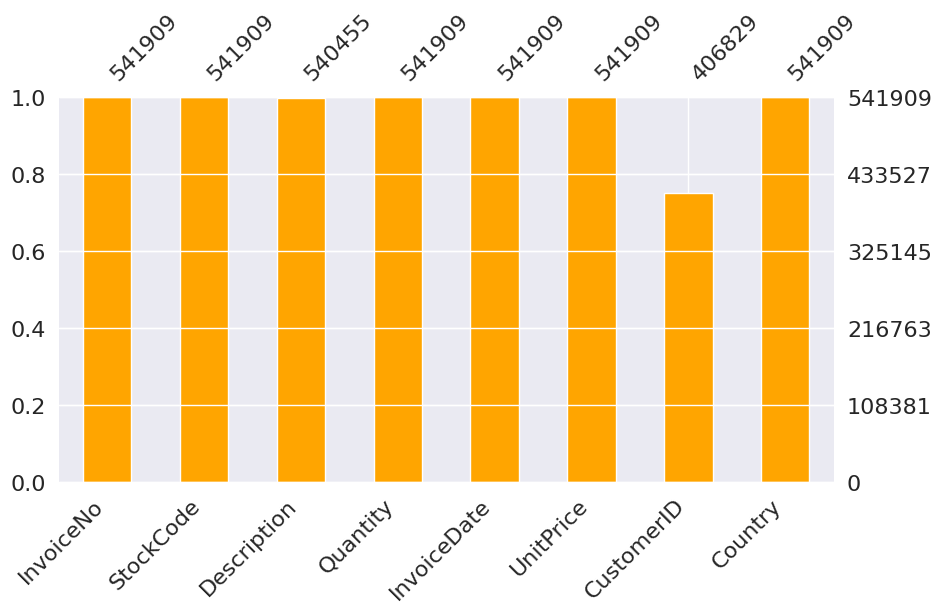

In [9]:
# Visualizing the missing values
msno.bar(df,figsize=(10,5), color="orange")

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
print(f"Column names of dataset is:\n{df.columns.tolist()}")

Column names of dataset is:
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [11]:
# Dataset Describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [12]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
df[df["Description"].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [14]:
# Count the number of unique values in the InvoiceNo column
transactions = df['InvoiceNo'].nunique()

# Count the number of unique values in the StockCode column
products_bought = df['StockCode'].nunique()

# Count the number of unique values in the CustomerID column
customers =df['CustomerID'].nunique()

# Calculate the percentage of missing customer information
missing_customers = round(df['CustomerID'].isnull().sum() * 100 / len(df), 2)

# Count the number of unique values in the Country column
countries = df['Country'].nunique()

# Print the results
print("Number of transactions: ", transactions)
print("Number of products bought: ", products_bought)
print("Number of customers:", customers)
print("Percentage of customers NA: ", missing_customers, "%")
print('Number of countries: ', countries)


Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38


Observation: A significant portion of customer data is not available, indicated by the high number of NA values.

In [15]:

# Get the unique values of the StockCode column
unique_stock_codes = df.StockCode.unique()

# Get the shape (number of rows and columns) of the unique values of the StockCode column
stock_code_shape = unique_stock_codes.shape

# Print the result
print("Shape of unique values of StockCode column:", stock_code_shape)

Shape of unique values of StockCode column: (4070,)


In [16]:

# Get the unique values in the Description column
unique_descriptions = df.Description.unique()

# Get the number of unique values in the Description column
num_unique_descriptions = unique_descriptions.shape

# Print the result
print("Number of unique descriptions:", num_unique_descriptions[0])

Number of unique descriptions: 4224


### What all manipulations have you done and insights you found?

The descriptions of the items in the dataset show that there are more descriptions than stock codes, meaning that some stock codes have multiple descriptions associated with them.


**Stockcode which have more than one description**

In [17]:
# Group the retail data by the StockCode and Description columns
cat_des_df = df.groupby(["StockCode", "Description"]).count().reset_index()

In [18]:

# Get the StockCode value counts where the count is greater than 1
# Reset the index and get the first 10 rows
head_stock_codes = (cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts() > 1]
                    .reset_index().head(10))

# Show the result
head_stock_codes

,index,StockCode
0,20713,8
1,23084,7
2,21830,6
3,85175,6
4,85172,5
5,72807A,5
6,23343,5
7,23131,5
8,21181,5
9,21829,4


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [19]:
# Create a variable 'cancelled_orders' to store all the rows in 'retail_df' where the value in the 'InvoiceNo' column contains the character 'C'
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]

# Display the first 5 rows of 'cancelled_orders' dataframe
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


#### Chart - 1

In [20]:
# Chart - 1 visualization code

# Determine the number of cancelled orders for each country
cancel_order_country = cancelled_orders.groupby('Country')['InvoiceNo'].count().reset_index()

# Sort the country-wise count of cancelled orders in descending order and get the top 10 countries
cancel_order_country_top10 = cancel_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_order_country_top10

,Country,InvoiceNo
0,United Kingdom,7856
1,Germany,453
2,EIRE,302
3,France,149
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


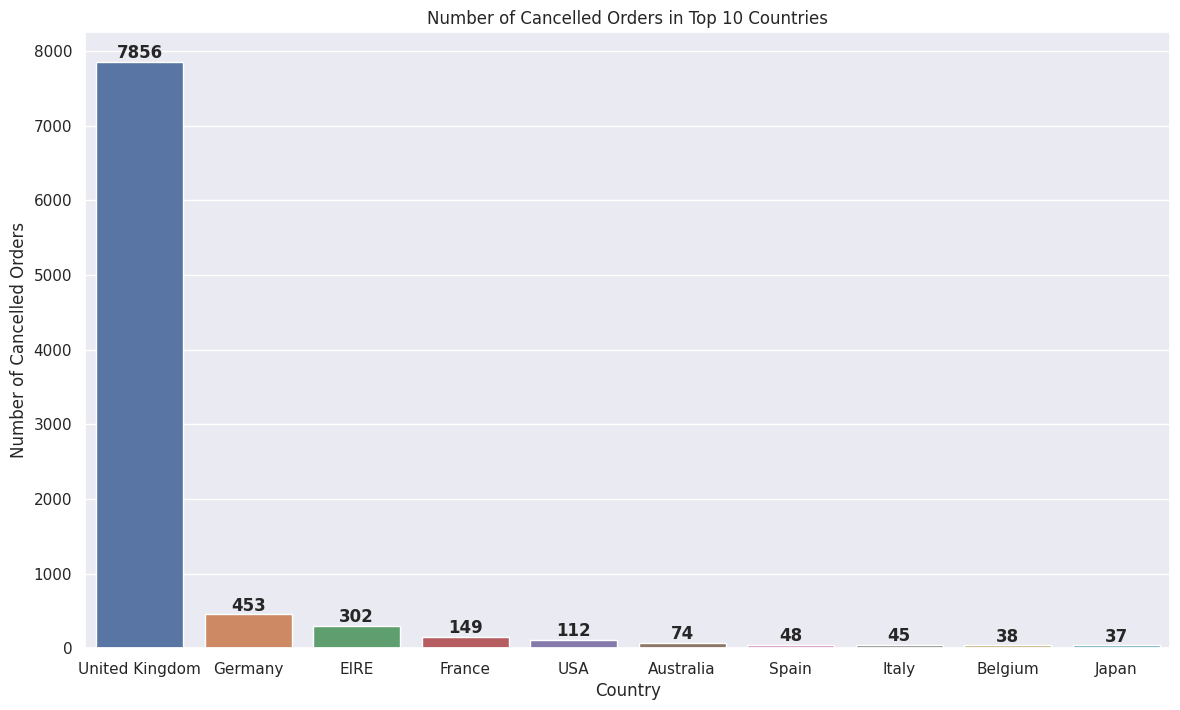

In [21]:

# Set the size of the figure to be displayed
plt.figure(figsize=(14,8))

# Plot the bar chart using Seaborn
sns.barplot(x='Country', y='InvoiceNo', data=cancel_order_country_top10)

# Add annotations on the bar charts
for i, v in enumerate(cancel_order_country_top10['InvoiceNo']):
    plt.text(i, v+50, str(v), ha='center', fontweight='bold')

# Add labels and title to the chart
plt.xlabel('Country') # Label for the x-axis
plt.ylabel('Number of Cancelled Orders') # Label for the y-axis
plt.title('Number of Cancelled Orders in Top 10 Countries') # Title for the chart

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Determine the top 10 countries with the most cancelled orders.

##### 2. What is/are the insight(s) found from the chart?

A bar chart was chosen to display the number of cancelled orders in the top 10 countries because it is an effective way to compare and visualize data.

The chart provides insight into the countries with the highest number of cancelled orders, which can help businesses identify potential issues with customer satisfaction or logistical issues.

The insights gained from the chart can help businesses improve their customer satisfaction and logistics processes, potentially leading to fewer cancelled orders and increased revenue.

#### Chart - 2

In [22]:
# Chart - 2 visualization code

# Group the retail data by customer ID and count the number of unique invoices for each customer ID
groupby_customers = pd.DataFrame(df.groupby("CustomerID")["InvoiceNo"].nunique())

# Display the first 5 rows of the resulting dataframe
print(groupby_customers.head())

            InvoiceNo
CustomerID           
12346.0             2
12347.0             7
12348.0             4
12349.0             1
12350.0             1


In [23]:
# Display summary statistics for the groupby_customers dataframe
groupby_customers.describe()

,InvoiceNo
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


In [24]:
# Group the retail_df dataframe by InvoiceNo and CustomerID
temp_df = df.groupby(['InvoiceNo','CustomerID'], as_index=False)

# Count the number of products in each invoice
temp_df = temp_df['InvoiceDate'].count()

# Rename the column 'InvoiceDate' to 'Number of products'
transaction_df = temp_df.rename(columns = {'InvoiceDate':'Number of products'})

# Print the result
print(transaction_df.head())

  InvoiceNo  CustomerID  Number of products
0    536365     17850.0                   7
1    536366     17850.0                   2
2    536367     13047.0                  12
3    536368     13047.0                   4
4    536369     13047.0                   1


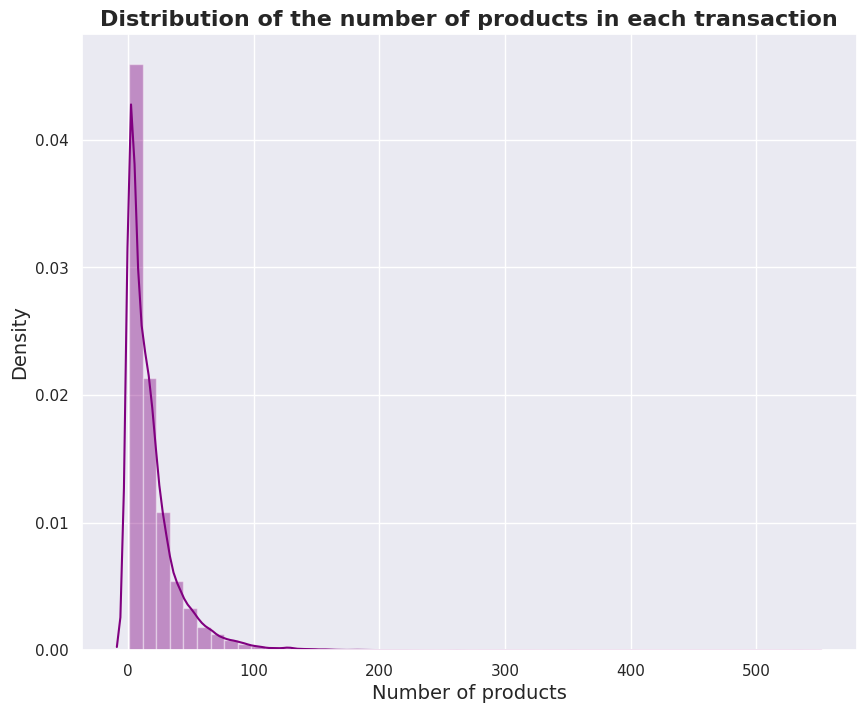

In [25]:
# Set the size of the plot
plt.figure(figsize=(10, 8))

# Plot the distribution of the number of products in each transaction
sns.distplot(transaction_df['Number of products'], color='purple')

# Add a title to the plot
plt.title("Distribution of the number of products in each transaction", fontsize=16, fontweight='bold')

# Add a label to the x-axis
plt.xlabel("Number of products", fontsize=14)

# Add a label to the y-axis
plt.ylabel("Density", fontsize=14)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Let's examine how many different products are purchased, as we found in the description of our dataframe that 75% of customers buy a quantity of 10.

##### 2. What is/are the insight(s) found from the chart?

The distribution of the number of products in each transaction is heavily skewed. The majority of customers purchase fewer than 25 items in a single transaction.

The insights gained from this histogram could be used to inform decisions about inventory management and product pricing. For example, if the data shows that most transactions involve only one or two products, a business may decide to focus on promoting those particular products or adjusting pricing to encourage customers to purchase more items per transaction.

#### Chart - 3

KeyError: ignored

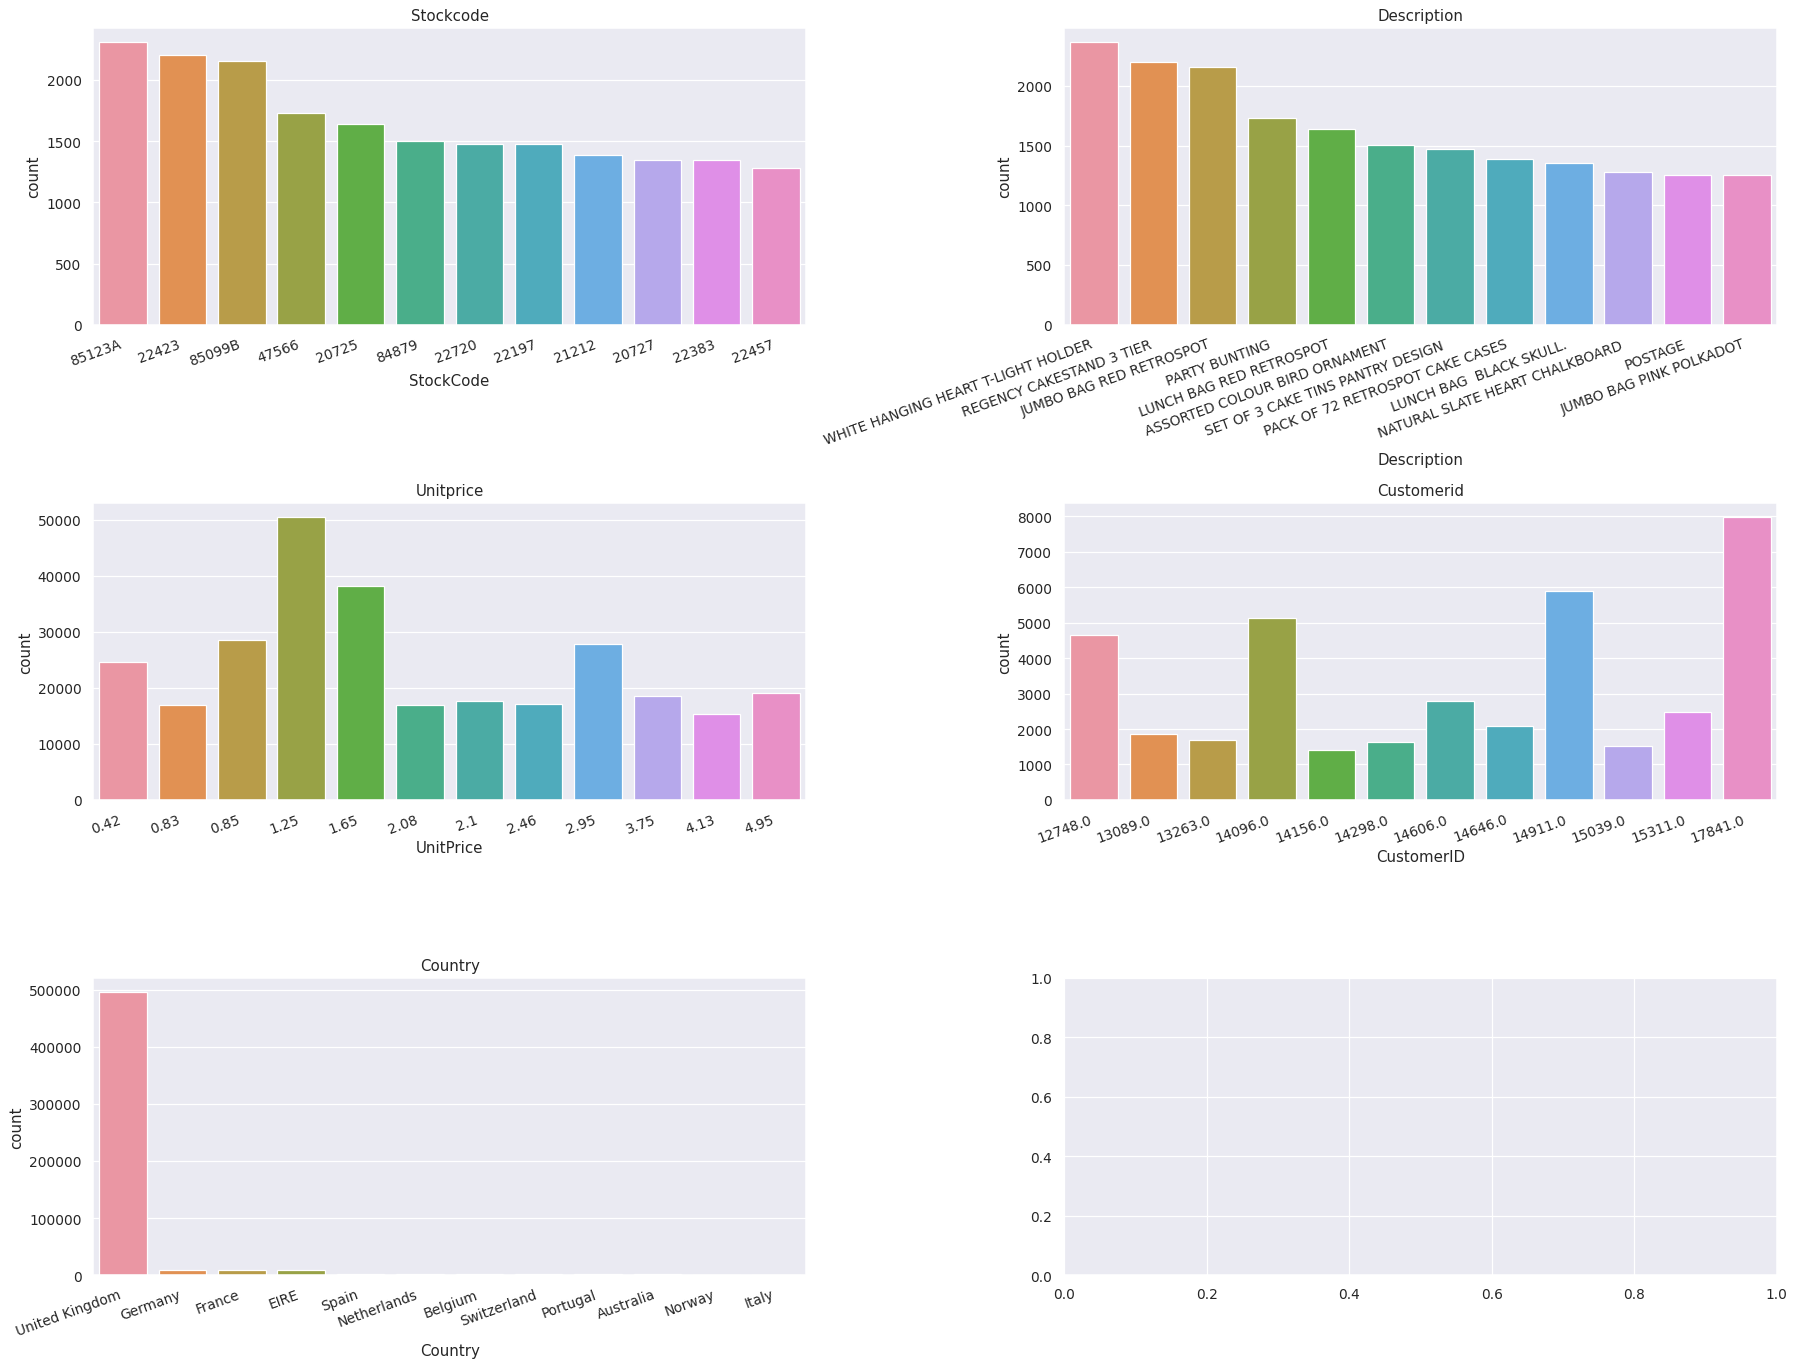

In [26]:
# Chart - 3 visualization code

# Plotting top values based on frequency in each column
target = ['StockCode', 'Description','UnitPrice', 'CustomerID', 'Country',
          'year', 'Month','Day','hour','TimeType']

plt.figure(figsize=(20,25), dpi=90)
for n,col in enumerate(target):
  plt.subplot(5, 2, n+1)
  temp = df[col].value_counts().reset_index().head(12)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

#### Chart - 4

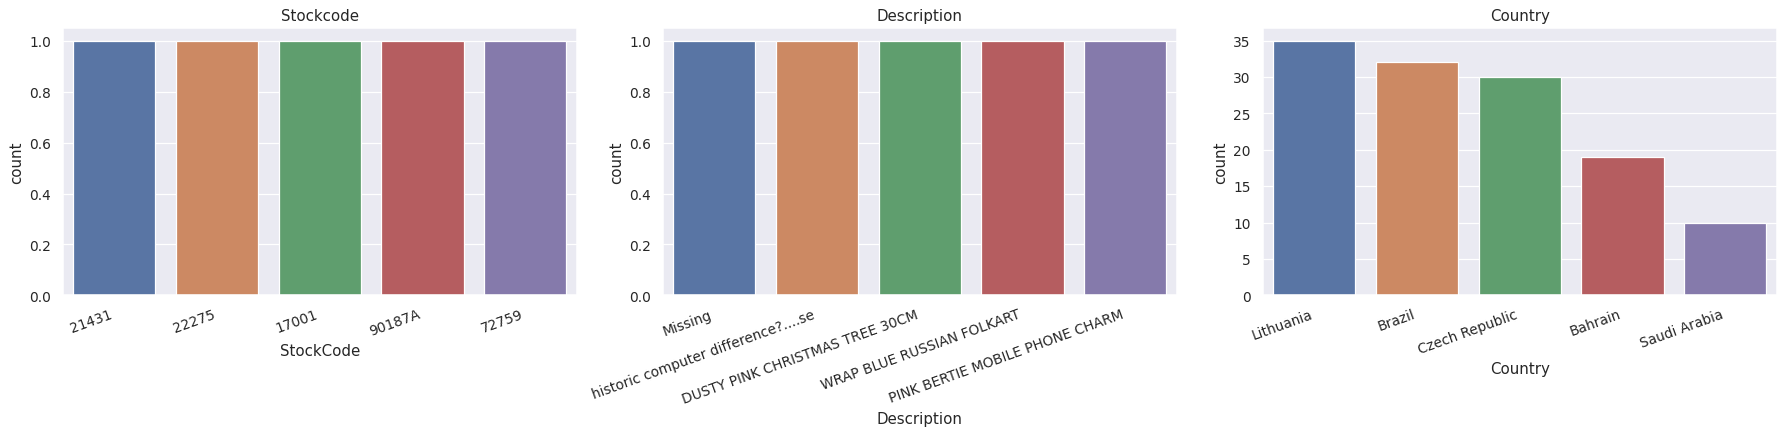

In [27]:
# Chart - 4 visualization code

# Plotting Bottom values based on frequency in each column
target = ['StockCode', 'Description','Country']
plt.figure(figsize=(20,5), dpi=90)
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  temp = df[col].value_counts().reset_index().tail(5)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [28]:
# Most orders placed are from these countries
country_invoice = df.groupby("Country").nunique()["InvoiceNo"].reset_index().sort_values("InvoiceNo",ascending=False)
country_invoice.rename(columns={'InvoiceNo': 'Invoice_Count'}, inplace=True)
country_invoice.head(10)

,Country,Invoice_Count
36,United Kingdom,23494
14,Germany,603
13,France,461
10,EIRE,360
3,Belgium,119
31,Spain,105
24,Netherlands,101
33,Switzerland,74
27,Portugal,71
0,Australia,69


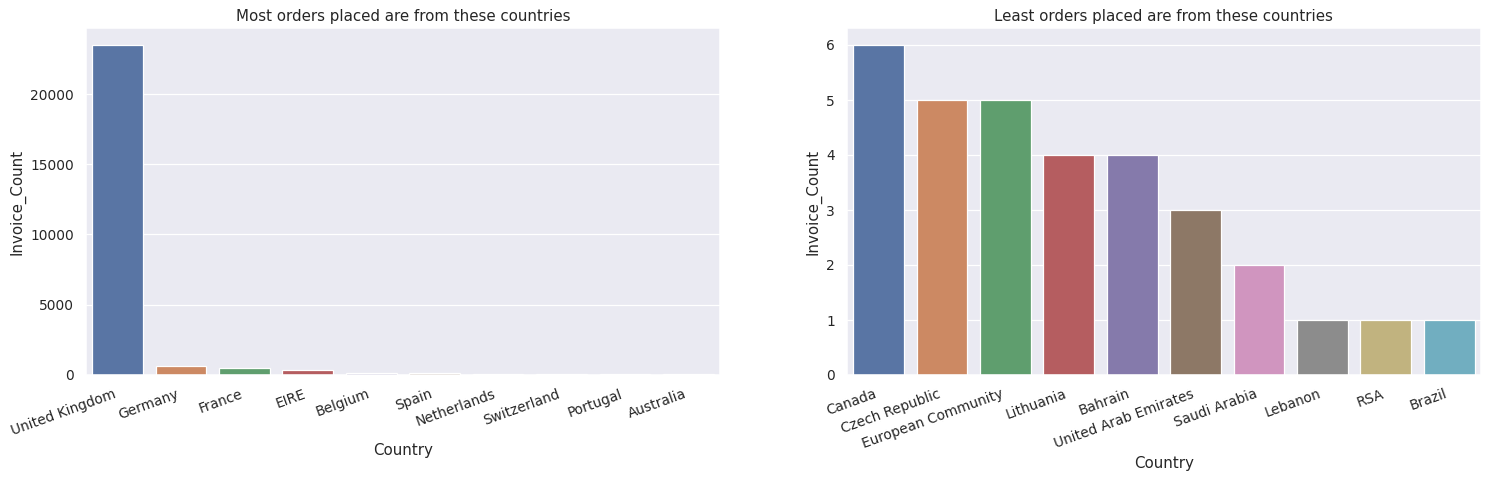

In [29]:
# Chart - 5 visualization code

# Visualizing top and bottom 10 countries based on total invoices
plt.figure(figsize=(20,5),dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most orders placed are from these countries")
sns.barplot(data=country_invoice.head(10),x="Country",y="Invoice_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least orders placed are from these countries")
sns.barplot(data=country_invoice.tail(10),x="Country",y="Invoice_Count")
plt.show()

#### Chart - 6

In [30]:
# Chart - 6 visualization code

# Most customers are from these countries
country_cust = df.groupby("Country").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
country_cust.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
country_cust.head()

,Country,Customer_Count
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25


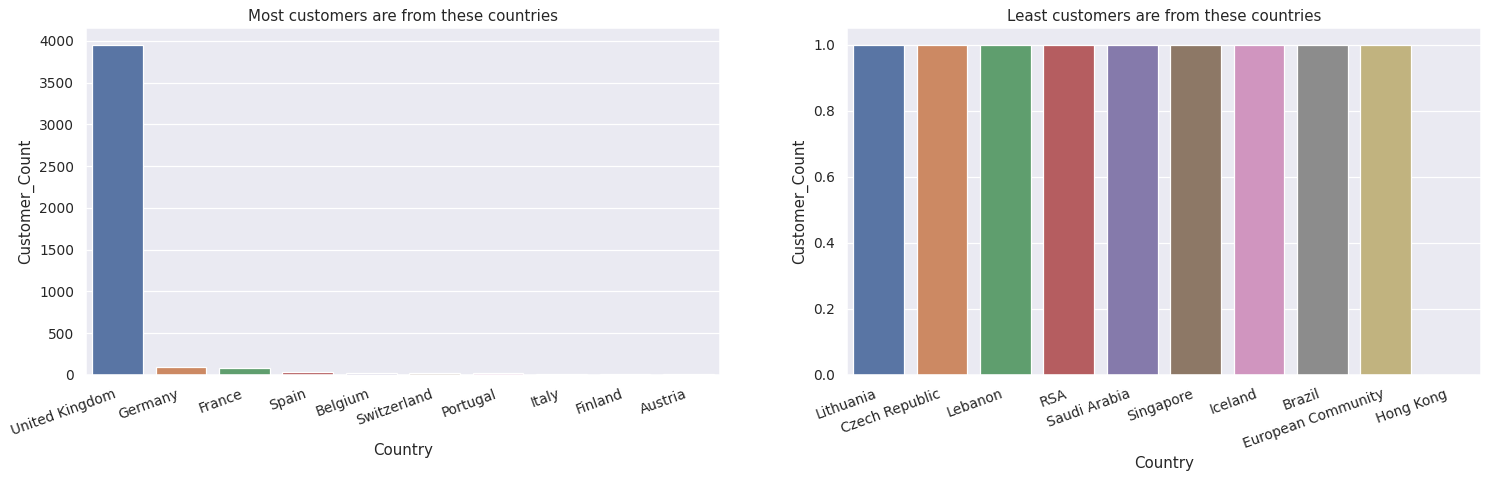

In [31]:
# Visualizing top and bottom 10 countries based on total customers
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most customers are from these countries")
sns.barplot(data=country_cust.head(10),x="Country",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least customers are from these countries")
sns.barplot(data=country_cust.tail(10),x="Country",y="Customer_Count")
plt.show()

In [151]:
# Chart - 7 visualization code
# Countrywise average item purchases
country_quantity = df.groupby("Country").mean()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
country_quantity.rename(columns={'Quantity': 'Average_Quantity'}, inplace=True)
country_quantity.head()

,Country,Average_Quantity
24,Netherlands,84.406580
32,Sweden,77.136364
20,Japan,70.441341
0,Australia,66.444003
30,Singapore,22.855895


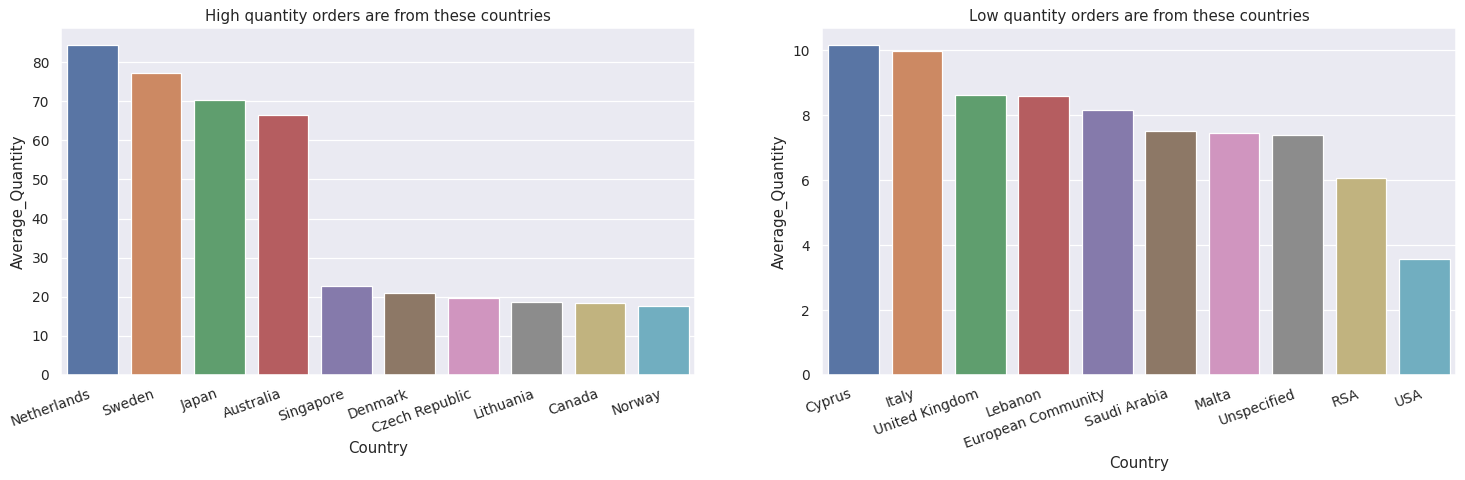

In [33]:
# Visualizing top and bottom 10 countries based on average item purchases
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("High quantity orders are from these countries")
sns.barplot(data=country_quantity.head(10),x="Country",y="Average_Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Low quantity orders are from these countries")
sns.barplot(data=country_quantity.tail(10),x="Country",y="Average_Quantity")
plt.show()

#### Chart - 8

In [34]:
# Chart - 8 visualization code
# quantity wise item purchases
product_quantity = df.groupby("Description").sum()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
product_quantity.head()

,Description,Quantity
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1866,JUMBO BAG RED RETROSPOT,47363
244,ASSORTED COLOUR BIRD ORNAMENT,36381
2740,POPCORN HOLDER,36334
2395,PACK OF 72 RETROSPOT CAKE CASES,36039


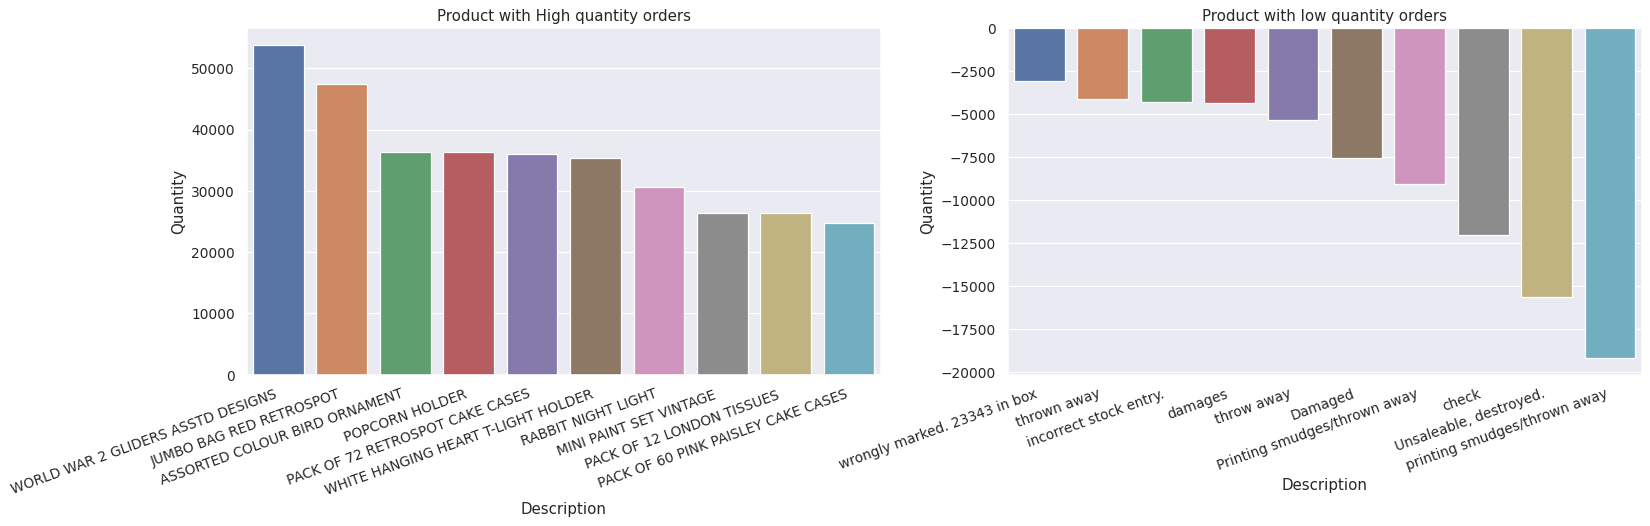

In [35]:

# Visualizing top and bottom 10 products based on purchase quantity
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with High quantity orders")
sns.barplot(data=product_quantity.head(10),x="Description",y="Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with low quantity orders")
sns.barplot(data=product_quantity.tail(10),x="Description",y="Quantity")
plt.show()

#### Chart - 9

In [36]:

# quantity wise item purchases
product_quantity = df.groupby("Description").sum()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
product_quantity.head()

,Description,Quantity
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1866,JUMBO BAG RED RETROSPOT,47363
244,ASSORTED COLOUR BIRD ORNAMENT,36381
2740,POPCORN HOLDER,36334
2395,PACK OF 72 RETROSPOT CAKE CASES,36039


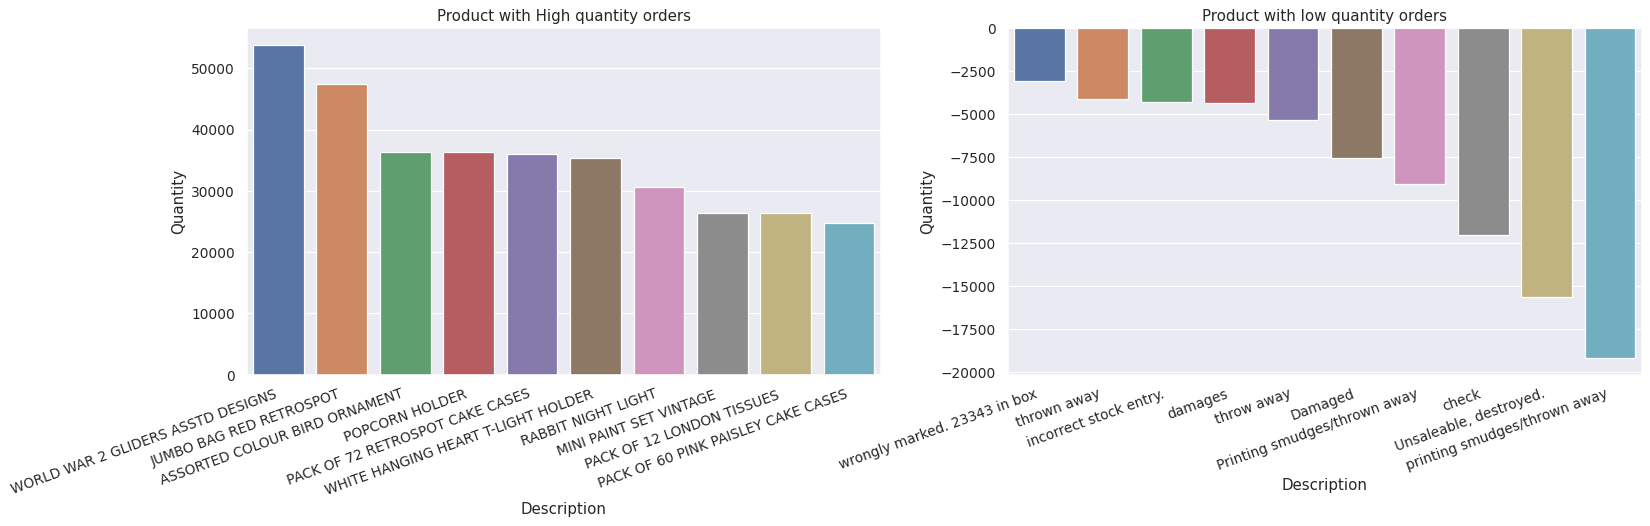

In [37]:

# Visualizing top and bottom 10 products based on purchase quantity
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with High quantity orders")
sns.barplot(data=product_quantity.head(10),x="Description",y="Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with low quantity orders")
sns.barplot(data=product_quantity.tail(10),x="Description",y="Quantity")
plt.show()


##### 1. Why did you pick the specific chart?
Visualising the top and bottom based on purchase quantity
as we used Bar graph beacause of it easly shown the difference

#### Chart - 10

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

<Axes: >

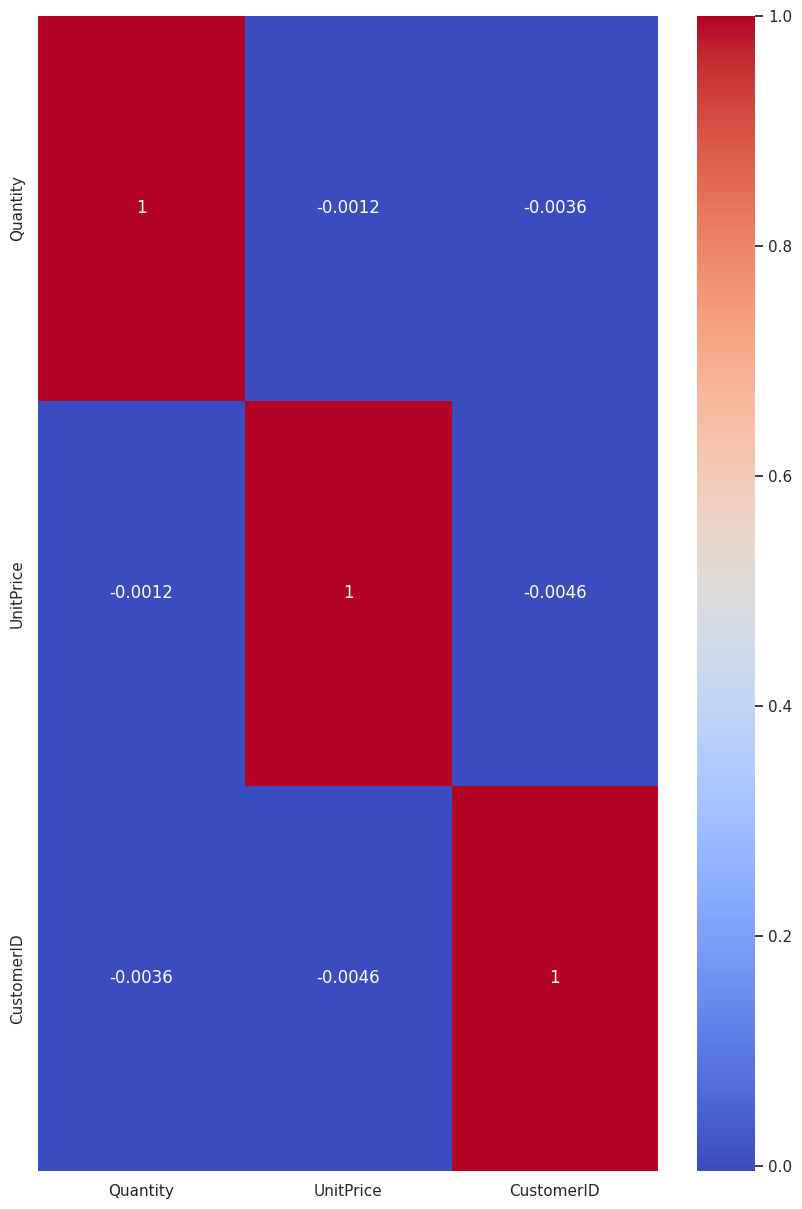

In [38]:
# Chart - 11 visualization code
correlation = df.corr()
plt.figure(figsize = [10, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

#### Chart - 14 - Correlation Heatmap

<Axes: >

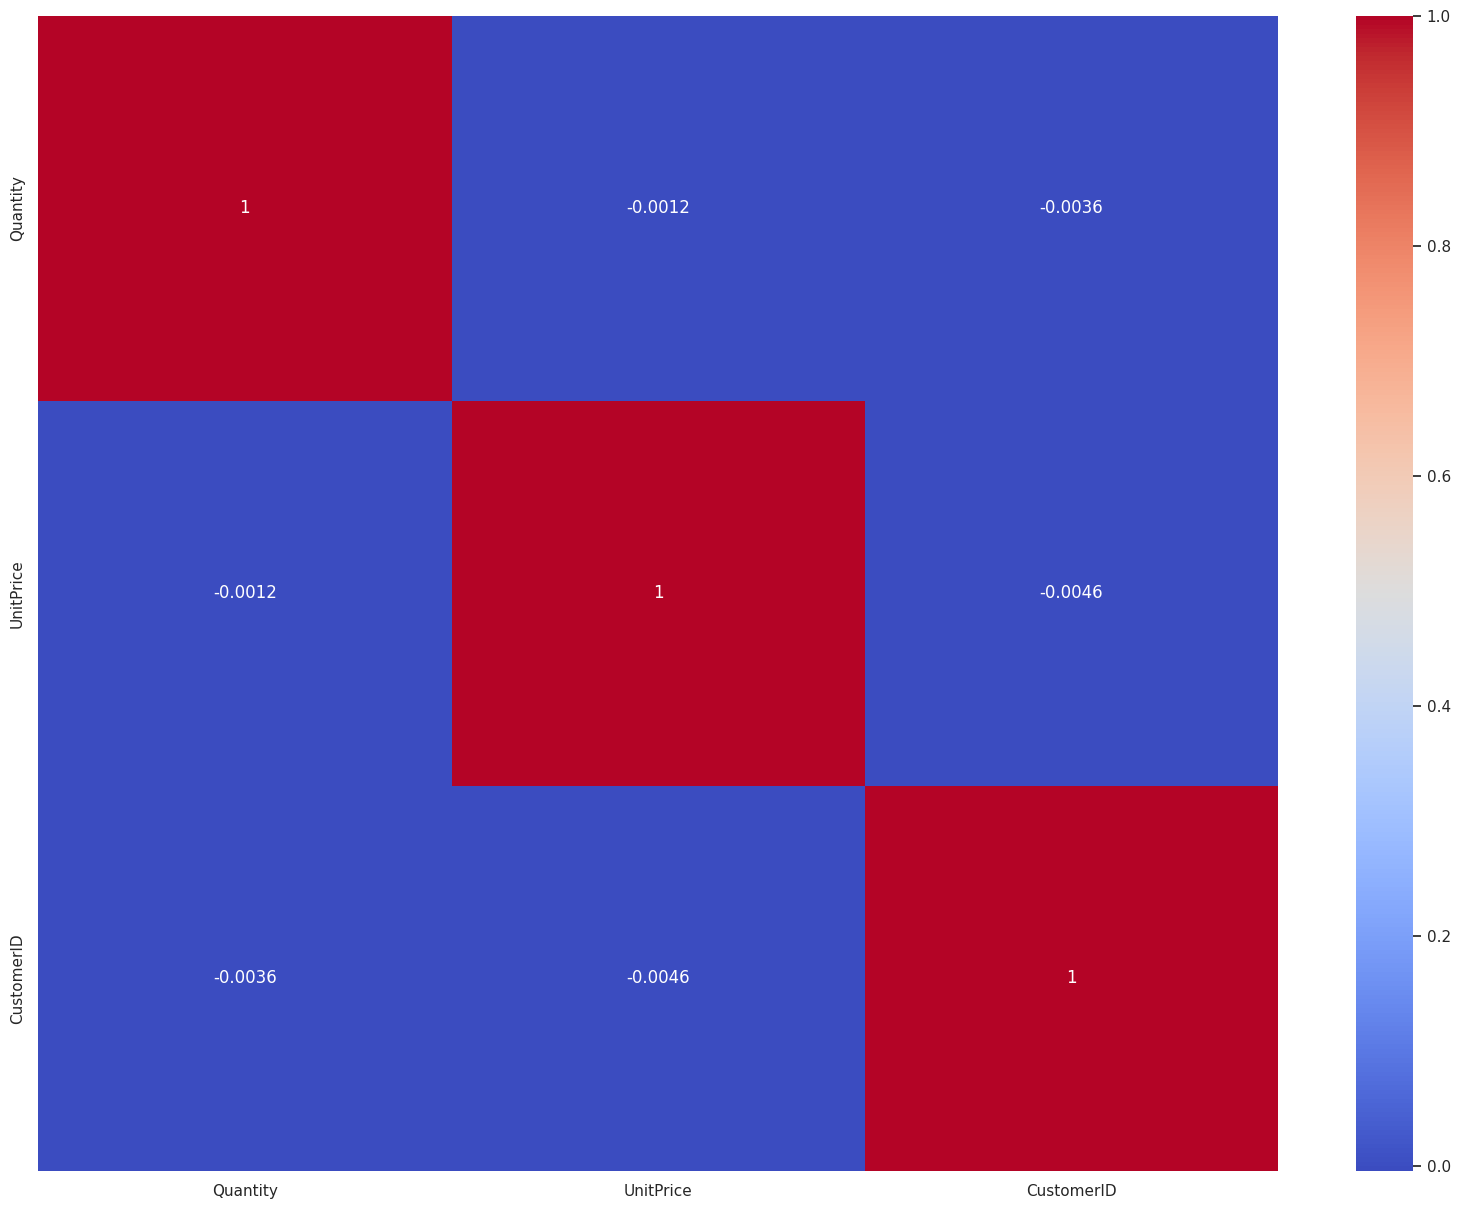

In [41]:
# Correlation Heatmap visualization code
#  defining new variable for pixels

df['Quantity']
correlation = df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

##### 1. Why did you pick the specific chart?

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [45]:
# Handling Missing Values & Missing Value Imputation
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

# Missing value percentage
print(missing_percentage(df))

              Total  Percent
CustomerID   135080    24.93
Description    1454     0.27
InvoiceNo         0     0.00
StockCode         0     0.00
Quantity          0     0.00
InvoiceDate       0     0.00
UnitPrice         0     0.00
Country           0     0.00


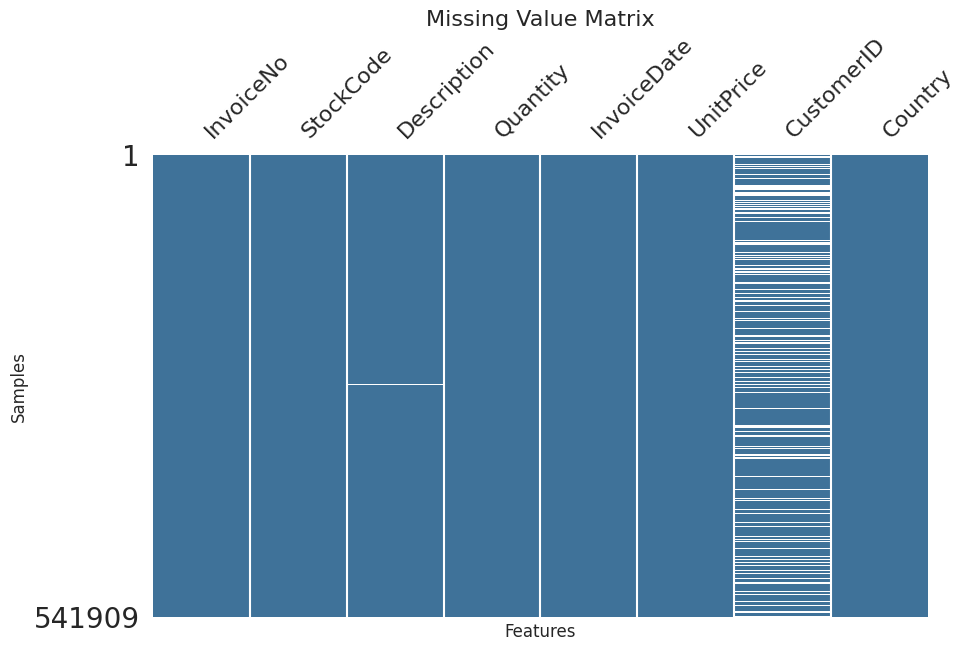

In [46]:
# Visualizing the missing values
import missingno as msno

# create missing value matrix plot
msno.matrix(df, figsize=(10,6), sparkline=False, color=(0.25, 0.45, 0.6))

# customize plot
plt.title('Missing Value Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Samples', fontsize=12)
plt.show()

In [47]:

# Make a copy of the original retail data dataframe
df_copy = df.copy()

**Removing the Cancelled order.**

In [48]:
# Filter the copied dataframe to only include rows where the 'Quantity' column is greater than 0
retail_df_copy = df_copy[df_copy['Quantity'] > 0]

# Check the shape of the filtered dataframe
print("Number of rows:", retail_df_copy.shape[0], "Number of columns:", retail_df_copy.shape[1])

Number of rows: 531285 Number of columns: 8


**Removing NA value**

In [49]:

# Remove all rows with missing values in the 'CustomerID' column
df_copy.dropna(subset=['CustomerID'], how='all', inplace=True)

# Check the shape of the updated dataframe
print(df_copy.shape)

(406829, 8)


In [50]:

# Check for missing values in the copied dataframe after removing NA values in 'CustomerID' column
df_copy.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Duplicate Values**

In [51]:

# Check for duplicates in the retail dataframe
df.duplicated().sum()

5268

# **Remove Duplicates**

In [52]:

# remove duplicates in place in the df_copy dataframe
df_copy.drop_duplicates(inplace=True)


In [53]:
# Checking shape after cleaning
df_copy.shape

(401604, 8)

#### What all missing value imputation techniques have you used and why did you use those techniques?

The missing value imputation technique used was dropping rows with missing values in the 'CustomerID' column. This approach was chosen because 'CustomerID' is a key identifier and dropping rows with missing values had minimal impact on the size of the dataset. Other imputation techniques such as imputing mean, median, or mode values were not utilized in this case.

# **Feature Engineering**

## **Convert the column InvoiceDate to datetime format.**

In [58]:

#Convert the InvoiceDate column to a datetime data type
df_copy["InvoiceDate"] = pd.to_datetime(retail_df_copy["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

**Create new features, Day and Month, from the InvoiceDate.**

In [59]:
# Create a new column named 'Day' in the retail_df_copy dataframe
df_copy['Day'] = retail_df_copy['InvoiceDate'].dt.day_name()

In [61]:
# Create a new column named 'Month' in the retail_df_copy dataframe
df_copy['Month'] = retail_df_copy['InvoiceDate'].dt.month_name()

## **Create new features from the Invoice Date such as Hours, Year, Month Number, and Day Number.**

In [62]:

# Create a new feature 'year' that contains the year of the InvoiceDate
df_copy["year"] = retail_df_copy["InvoiceDate"].apply(lambda x: x.year)

# Create a new feature 'month_num' that contains the number of the month of the InvoiceDate
df_copy["month_num"] = retail_df_copy["InvoiceDate"].apply(lambda x: x.month)

# Create a new feature 'day_num' that contains the number of the day of the month of the InvoiceDate
df_copy["day_num"] = retail_df_copy["InvoiceDate"].apply(lambda x: x.day)

# Create a new feature 'hour' that contains the hour of the day of the InvoiceDate
df_copy["hour"] = retail_df_copy["InvoiceDate"].apply(lambda x: x.hour)

# Create a new feature 'minute' that contains the minute of the hour of the InvoiceDate
df_copy["minute"] = retail_df_copy["InvoiceDate"].apply(lambda x: x.minute)

In [63]:
# Check the head of the dataset after extracting new features from existing features
retail_df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December


In [64]:

# Check the shape of the retail_df_copy dataframe after creating new features
shape = retail_df_copy.shape
print("The shape of the retail_df_copy dataframe is:", shape)

The shape of the retail_df_copy dataframe is: (531285, 9)


**Distribution of Unit Price**

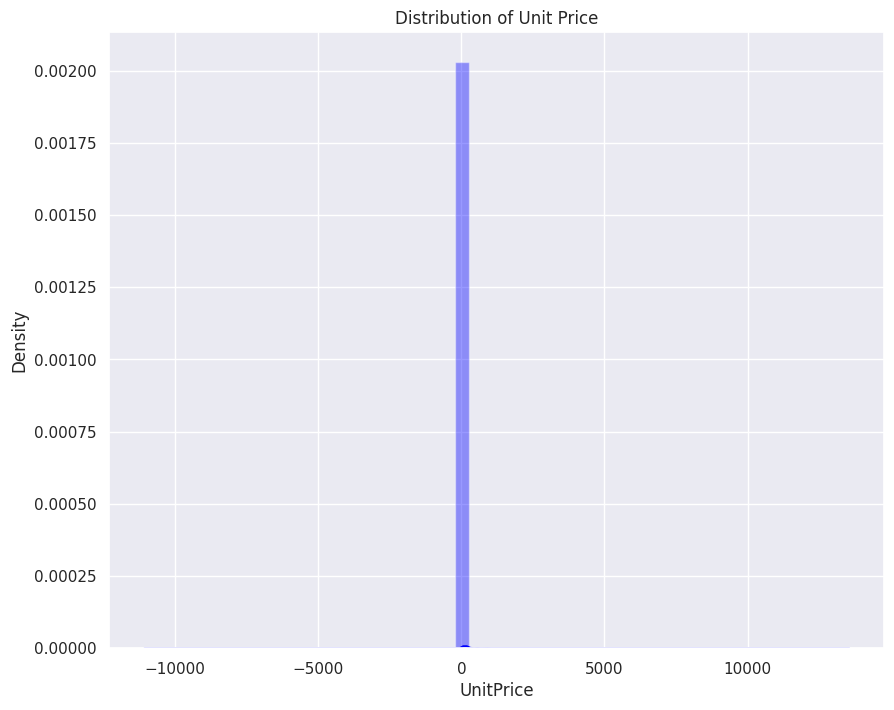

In [65]:
# Create a figure with a specified size
plt.figure(figsize=(10,8))

# Set the title for the plot
plt.title('Distribution of Unit Price')

# Plot the distribution of the UnitPrice column using the seaborn distplot function
sns.distplot(retail_df_copy['UnitPrice'], color='blue')

# Show the plot
plt.show()

Distplot was chosen as it provides a visual representation of the distribution of UnitPrice values in the dataset. It shows the shape of the distribution and any potential outliers.

This chart shows the frequency of different UnitPrice values in the dataset. There are also a few outliers at very high values.

# **RFM Analysis**

RFM analysis is a marketing technique that segments customers based on their recency (time since last purchase), frequency (number of purchases), and monetary value (amount spent) of their transactions. This helps businesses understand their customers better and make data-driven decisions about marketing and customer engagement.

**Creating Recency Attributes**

In [78]:

# Import the time and warnings modules from the Python Standard Library
import time
import warnings

# Import the datetime module as "dt" for easier use
import datetime as dt

In [79]:
# Get the maximum value of the 'InvoiceDate' column
last_date = retail_df_copy['InvoiceDate'].max()

# Output the result
print(last_date)

2011-12-09 12:50:00


In [80]:

# Create a date object representing December 9th, 2011
now = dt.date(2011, 12, 9)

# Print the date object
print(now)

2011-12-09


In [81]:
# Create a new column called 'date' in the 'retail_df_copy' DataFrame
retail_df_copy['date'] = retail_df_copy['InvoiceDate'].dt.date

# Extract the date component of the 'InvoiceDate' column in the DataFrame
# The '.dt' accessor is used to access the datetime attributes of the 'InvoiceDate' column
# The '.date' attribute returns the date component of the datetime value

In [82]:
# Display the first 5 rows of the DataFrame
retail_df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,2010-12-01


In [83]:
# Group the data by customer ID and find the most recent purchase date for each customer
recency_df = retail_df_copy.groupby(by='CustomerID', as_index=False)['date'].max()

# Rename the columns in the resulting dataframe to reflect the customer ID and most recent purchase date
recency_df.columns = ['CustomerID','LastPurchaseDate']

# Display the first few rows of the dataframe to inspect the results
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


import numpy as np
from google.colab import autoviz
df_9093312162045484607 = autoviz.get_df('df_9093312162045484607')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_9093312162045484607, *['CustomerID'], **{})
chart

import numpy as np
from google.colab import autoviz
df_505353852789932963 = autoviz.get_df('df_505353852789932963')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_505353852789932963, *['CustomerID'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1196360395234427859 = autoviz.get_df('df_1196360395234427859')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1196360395234427859, *['LastPurchaseDate', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_7215279157875420369 = autoviz.get_df('df_7215279157875420369')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7215279157875420369, *['CustomerID', 'count()', None], **{})
chart

In [84]:

# Calculate the recency of each customer's last purchase
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)

In [85]:

# Display the first 10 rows of the recency dataframe
recency_df.head(10)

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
5,12352.0,2011-11-03,36
6,12353.0,2011-05-19,204
7,12354.0,2011-04-21,232
8,12355.0,2011-05-09,214
9,12356.0,2011-11-17,22


In [86]:
# Drop the 'LastPurchaseDate' column from the dataframe
recency_df.drop('LastPurchaseDate',axis=1,inplace=True)

# **Creating Frequency Attributes**

In [87]:
# Group the data by customer ID and count the number of invoices for each customer
frequency_df = retail_df_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()

# Rename the columns in the resulting dataframe to reflect the customer ID and purchase frequency
frequency_df.columns = ['CustomerID','Frequency']

# Display the first 10 rows of the dataframe to inspect the results
frequency_df.head(10)

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
5,12352.0,85
6,12353.0,4
7,12354.0,58
8,12355.0,13
9,12356.0,59


# **Creating Monetary Attributes**

In [89]:
# Group the data by customer ID and sum the total amount spent by each customer
monetary_df = retail_df_copy.groupby(by='CustomerID', as_index=False)['Quantity'].sum()

# Rename the columns in the resulting dataframe to reflect the customer ID and total amount spent
monetary_df.columns = ['CustomerID','MonetaryValue']

# Display the first few rows of the dataframe to inspect the results
monetary_df.head()

,CustomerID,MonetaryValue
0,12346.0,74215
1,12347.0,2458
2,12348.0,2341
3,12349.0,631
4,12350.0,197


The RFM dataframe combines recency, frequency, and monetary value information for each customer to provide a comprehensive overview of their behavior and spending habits.

In [90]:
# Merge the recency and frequency dataframes on the customer ID column
temp_df = recency_df.merge(frequency_df, on='CustomerID')

# Merge the monetary value dataframe on the customer ID column
rfm_df = temp_df.merge(monetary_df, on='CustomerID')

# Display the first few rows of the resulting dataframe to inspect the results
rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,325,1,74215
1,12347.0,2,182,2458
2,12348.0,75,31,2341
3,12349.0,18,73,631
4,12350.0,310,17,197


In [91]:
# Calculate quantiles for the RFM dataframe
quantiles = rfm_df[['Recency', 'Frequency', 'MonetaryValue']].quantile(q=[0.25,0.5,0.75])

# Print the quantile values for inspection
print(quantiles)

      Recency  Frequency  MonetaryValue
0.25     17.0       17.0          160.0
0.50     50.0       41.0          379.0
0.75    141.5      100.0          993.0


In [92]:

# Convert quantile values to dictionary
quantiles_dict = quantiles.transpose().to_dict()

# Print the dictionary for inspection
print(quantiles_dict)

{0.25: {'Recency': 17.0, 'Frequency': 17.0, 'MonetaryValue': 160.0}, 0.5: {'Recency': 50.0, 'Frequency': 41.0, 'MonetaryValue': 379.0}, 0.75: {'Recency': 141.5, 'Frequency': 100.0, 'MonetaryValue': 993.0}}


# **Creating RFM table and calculating RFM Score**

In [93]:

# Assigning quantile labels to Recency, Frequency and MonetaryValue
quantile_labels = ['1_quartile', '2_quartile', '3_quartile', '4_quartile']

# Creating RecencyScore column by dividing Recency into quartiles and assigning respective quantile labels
rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(4, 0, -1)))

# Creating FrequencyScore column by dividing Frequency into quartiles and assigning respective quantile labels
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

# Creating MonetaryScore column by dividing MonetaryValue into quartiles and assigning respective quantile labels
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['MonetaryValue'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

In [94]:

# Show first 5 rows of the rfm_df dataframe
rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,12346.0,325,1,74215,1,1,4
1,12347.0,2,182,2458,4,4,4
2,12348.0,75,31,2341,2,2,4
3,12349.0,18,73,631,3,3,3
4,12350.0,310,17,197,1,1,2


In [95]:
# Concatenate the RecencyScore, FrequencyScore, and MonetaryScore columns into one RFMScore column
rfm_df['RFMScore'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)



In [96]:
# Sort the dataframe by MonetaryValue in descending order and reset the index
rfm_df2 = rfm_df[rfm_df['RFMScore'] == '444'].sort_values('MonetaryValue', ascending=False)

In [97]:

rfm_df2.head(10)


,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
1690,14646.0,1,2080,197491,4,4,4,444
1880,14911.0,1,5677,80515,4,4,4,444
3729,17450.0,8,337,69993,4,4,4,444
3772,17511.0,2,963,64549,4,4,4,444
4202,18102.0,0,431,64124,4,4,4,444
997,13694.0,3,568,63312,4,4,4,444
1435,14298.0,8,1637,58343,4,4,4,444
1334,14156.0,9,1400,57885,4,4,4,444
3177,16684.0,4,277,50255,4,4,4,444
2177,15311.0,0,2379,38194,4,4,4,444


In [98]:

# Categorising customer or making customer segmentation based on RFM Score
print("Best Customers: ",len(rfm_df[rfm_df['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_df[rfm_df['FrequencyScore']==4]))
print("Big Spenders: ",len(rfm_df[rfm_df['MonetaryScore']==4]))
print('Almost Lost: ', len(rfm_df[rfm_df['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_df[rfm_df['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_df[rfm_df['RFMScore']=='111']))

Best Customers:  435
Loyal Customers:  1080
Big Spenders:  1083
Almost Lost:  101
Lost Customers:  16
Lost Cheap Customers:  405


# **With the segmentation of our customers based on their RFM scores, we can now tailor our marketing strategies to each segment effectively.**

For example, our "Best Customers" or "Champions" can be rewarded for their loyalty. These customers can also serve as early adopters for new products, so we can suggest them to participate in a "Refer a Friend" program.

For customers who are "At Risk", we can send them personalized emails to encourage them to make a purchase. This can help to retain them as customers and keep them engaged with our brand.

In [99]:

# Dropping the RFMScore and its components columns from the dataframe
rfm_data = rfm_df.drop(['FrequencyScore','RecencyScore','MonetaryScore','RFMScore'], axis=1)

# Setting the customer id as index of the dataframe
rfm_data.set_index("CustomerID", inplace=True)

# Printing the first 5 rows of the updated dataframe
rfm_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,1,74215
12347.0,2,182,2458
12348.0,75,31,2341
12349.0,18,73,631
12350.0,310,17,197


In [100]:

# Calculate the correlation between the variables
correlation = rfm_data.corr()

# Display the correlation matrix
correlation

,Recency,Frequency,MonetaryValue
Recency,1.000000,-0.206085,-0.124110
Frequency,-0.206085,1.000000,0.429788
MonetaryValue,-0.124110,0.429788,1.000000


# **Corelation Heatmap**

<Axes: >

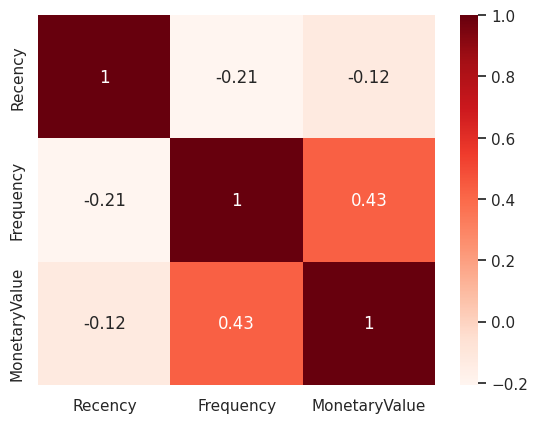

In [101]:

# Plotting the heatmap of the feature correlations in the dataframe
sns.heatmap(rfm_data.corr(), annot=True, cmap='Reds')

I picked this chart to show the correlation between different variables.

The insight is that there is a negative correlation between recency and both frequency and monetary, indicating that customers who have recently made a purchase are less likely to make another purchase. There is also a positive but weak correlation between frequency and monetary.

The insights can help create a positive business impact by helping businesses better understand customer behaviour and tailor their sales and promotions accordingly.

# **Pair Plot**

**Plot the distribution of Recency, Frequency, and MonetaryValue.**

A scatter matrix is a visual representation of the relationships between multiple variables or features in a dataset. It can help identify patterns, trends, and correlations between the variables. It is a useful tool for exploratory data analysis and can help provide insight into the data.

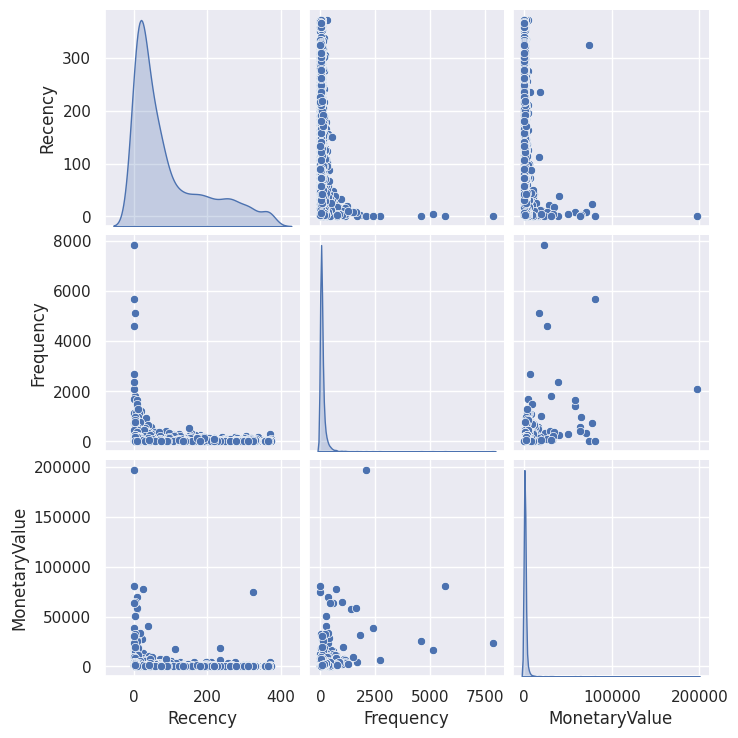

In [102]:

#Visualizing the distribution of features in the dataset using Seaborn.
sns.pairplot(rfm_data, diag_kind='kde')

The pairplot with kde diagonal plots was chosen as it is an effective way to visualize the distribution and pairwise relationships between multiple features in a dataset. It allows us to quickly identify any correlations or patterns between variables, making it an excellent choice for visualizing the distribution of features in the dataset.

We can observe that the distributions of the three variables are skewed. This suggests that normalization is necessary to make the data features normally distributed, as most clustering algorithms require them to be normally distributed.

In [103]:

#The skew() method is used to measure the asymmetry of the data around the mean.
rfm_data.skew()

Recency           1.246137
Frequency        18.106243
MonetaryValue    20.377286
dtype: float64

# **Data Normalization**

"For data normalization, logarithmic transformations were applied to the Recency and Monetary features, while a natural logarithmic transformation was applied to the Frequency feature. This was done to reduce the impact of outliers and to scale the data. A small constant value (0.1) was added to the original values before taking the logarithm to avoid taking the logarithm of zero or negative values."

In [104]:
# Calculate the logarithmic values of the Recency and Monetary features
rfm_r_log = np.log(rfm_data['Recency'] + 0.1)  # logarithmic value of the Recency feature
rfm_m_log = np.log(rfm_data['MonetaryValue'] + 0.1)  # logarithmic value of the Monetary feature
rfm_f_log = np.log(rfm_data['Frequency'])  # calculate the natural log of the 'Frequency' column

In [105]:

# Create a dictionary with the logarithmic values of the Monetary, Recency, and Frequency features
data = {
    'Monetary': rfm_m_log,  # logarithmic value of the Monetary feature
    'Recency': rfm_r_log,   # logarithmic value of the Recency feature
    'Frequency': rfm_f_log  # logarithmic value of the Frequency feature
}

# Create a pandas DataFrame from the dictionary
log_data = pd.DataFrame(data)
log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,11.214723,5.784133,0.000000
12347.0,7.807144,0.741937,5.204007
12348.0,7.758376,4.318821,3.433987
12349.0,6.447464,2.895912,4.290459
12350.0,5.283711,5.736895,2.833213


# **Plot the distribution of Recency, Frequency, and MonetaryValue after Data Normalization**

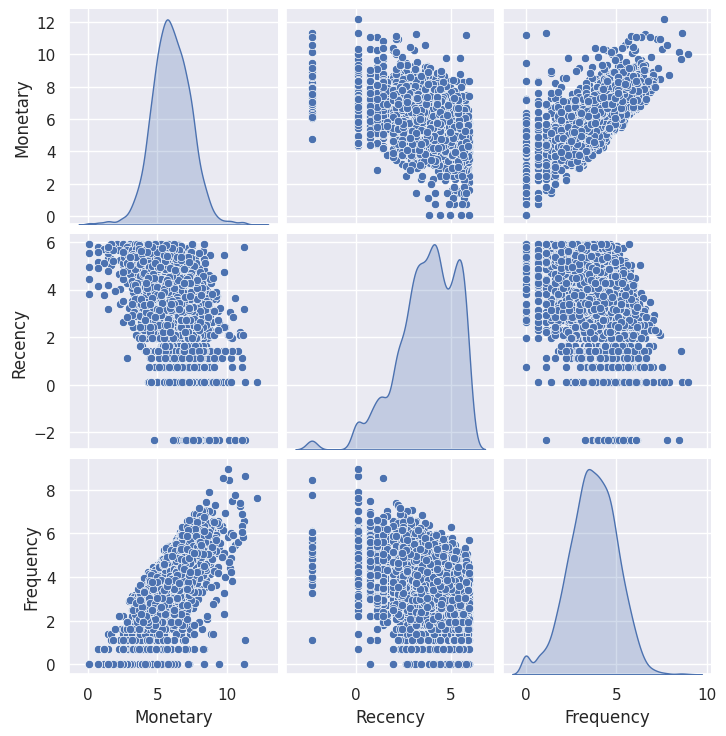

In [106]:
# Use seaborn's pairplot function to create a scatter matrix for each pair of features in the data
sns.pairplot(data=log_data, diag_kind='kde')

The distribution of the Frequency and Monetary features have improved and appear to be more normal, but the distribution of the Recency feature has only improved to some extent and is still not as well-normalized as the other two features.

In [107]:

# Calculate the skewness of each feature in the data
log_data.skew()


Monetary    -0.020248
Recency     -0.869174
Frequency   -0.220155
dtype: float64

**Corelation Heatmap**

<Axes: >

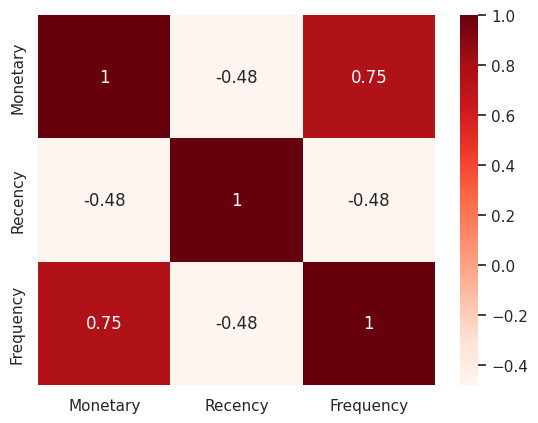

In [108]:
# Features correlation after log transformation or data normalization
sns.heatmap(log_data.corr(),annot=True, cmap='Reds')

**The correlation between Monetary and Frequency is now stronger.**

In [109]:
 # use the corr method of the data frame to calculate the correlation matrix
log_data.corr()

,Monetary,Recency,Frequency
Monetary,1.000000,-0.479832,0.753552
Recency,-0.479832,1.000000,-0.477778
Frequency,0.753552,-0.477778,1.000000


In [110]:
# Assign the normalized data to a variable "X"
X = log_data

**Data Scaling**


In [ ]:
# Define the features to use for K-means
features = ['Recency', 'Frequency', 'Monetary']

# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(log_data[features].values)

I used Standardization to transform my features in order to ensure that they had a similar scale and distribution. This was important because some machine learning algorithms are sensitive to the scale and distribution of features, and Standardization helps to ensure unbiased results.

# **Hypothesis Testing**

# **Hypothetical Statement - 1**

**Do recent customers tend to spend more?**
1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
Null hypothesis: Recent customers do not tend to spend more than older customers.

Alternative hypothesis: Recent customers tend to spend more than older customers.

**2. Perform an appropriate statistical test.**

In [112]:
from scipy.stats import ttest_ind

# create two groups: recent (made a purchase within the last 30 days) and older (made a purchase more than 30 days ago)
recent = rfm_data[rfm_data['Recency'] <= 30]
older = rfm_data[rfm_data['Recency'] > 30]

# calculate mean monetary value for each group
mean_recent = np.mean(recent['MonetaryValue'])
mean_older = np.mean(older['MonetaryValue'])

# state the null hypothesis and alternative hypothesis
null_hypothesis = "Recent customers do not tend to have a higher monetary value than older customers"
alternative_hypothesis = "Recent customers tend to have a higher monetary value than older customers"

# perform two-sample t-test
t, p = ttest_ind(recent['MonetaryValue'], older['MonetaryValue'], equal_var=True)

# determine whether to reject the null hypothesis based on the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. " + alternative_hypothesis)
else:
    print("Fail to reject the null hypothesis. " + null_hypothesis)

# output the mean monetary value for each group, as well as the t-statistic and p-value
print("Mean monetary value of recent customers: ", mean_recent)
print("Mean monetary value of non-recent customers: ", mean_older)
print("T-statistic: ", t)
print("P-value: ", p)
print("Degrees of freedom: ", len(recent) + len(older) - 2)

Reject the null hypothesis. Recent customers tend to have a higher monetary value than older customers
Mean monetary value of recent customers:  2171.7667865707435
Mean monetary value of non-recent customers:  583.7472856608013
T-statistic:  10.183669543616308
P-value:  4.368854432363546e-24
Degrees of freedom:  4337


## **Reject the null hypothesis. Recent customers tend to have a higher monetary value than older custom**ers

**Hypothetical Statement - 2**
1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Do frequent customer spend large or small amount at a time?**
> Null hypothesis: Frequent customers do not spend more than non-frequent customers.

> Alternative hypothesis: Frequent customers spend more than non-frequent customers.

2. Perform an appropriate statistical test.

In [113]:

# create two groups: frequent (made more than 10 purchases) and non-frequent (made 10 or fewer purchases)
frequent = rfm_data[rfm_data['Frequency'] > 10]
non_frequent = rfm_data[rfm_data['Frequency'] <= 10]

# calculate mean monetary value for each group
mean_frequent = np.mean(frequent['MonetaryValue'])
mean_non_frequent = np.mean(non_frequent['MonetaryValue'])

# state the null hypothesis and alternative hypothesis
null_hypothesis = "Frequent customers do not spend more than non-frequent customers"
alternative_hypothesis = "Frequent customers spend more than non-frequent customers"

# perform two-sample t-test
t, p = ttest_ind(frequent['MonetaryValue'], non_frequent['MonetaryValue'], equal_var=True)

# determine whether to reject the null hypothesis based on the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. " + alternative_hypothesis)
else:
    print("Fail to reject the null hypothesis. " + null_hypothesis)

# output the mean monetary value for each group, as well as the t-statistic and p-value
print("Mean monetary value of frequent customers: ", mean_frequent)
print("Mean monetary value of non-frequent customers: ", mean_non_frequent)
print("Standard deviation of monetary value for frequent customers: ", np.std(frequent['MonetaryValue']))
print("Standard deviation of monetary value for non-frequent customers: ", np.std(non_frequent['MonetaryValue']))
print("T-statistic: ", t)
print("P-value: ", p)
print("Degrees of freedom: ", len(frequent) + len(non_frequent) - 2)

Reject the null hypothesis. Frequent customers spend more than non-frequent customers
Mean monetary value of frequent customers:  1318.68352365416
Mean monetary value of non-frequent customers:  501.63086232980334
Standard deviation of monetary value for frequent customers:  5157.008945467071
Standard deviation of monetary value for non-frequent customers:  4380.877312148843
T-statistic:  3.831533115274942
P-value:  0.0001291488675946384
Degrees of freedom:  4337


### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

## ***7. ML Model Implementation***

### ML Model - 1
**K-means Implementation**

K-means is a clustering algorithm that groups data points into K clusters. Choosing the right number of clusters can be challenging. The Silhouette Coefficient can be used to evaluate the quality of the clusters by measuring the similarity of each data point to its assigned cluster. A high Silhouette Score indicates a good quality cluster. To ensure a high-quality solution, k-means++ should be used for initialization.

In [114]:
# Importing Libraries
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.preprocessing import StandardScaler

# **1.1 K-Means with silhouette_score**

Silhouette score for 2 clusters: 0.386
Silhouette score for 3 clusters: 0.303
Silhouette score for 4 clusters: 0.298
Silhouette score for 5 clusters: 0.285
Silhouette score for 6 clusters: 0.265
Silhouette score for 7 clusters: 0.269
Silhouette score for 8 clusters: 0.258
Silhouette score for 9 clusters: 0.248
Silhouette score for 10 clusters: 0.254
Silhouette score for 11 clusters: 0.261
Silhouette score for 12 clusters: 0.268
Silhouette score for 13 clusters: 0.270
Silhouette score for 14 clusters: 0.262
Silhouette score for 15 clusters: 0.251


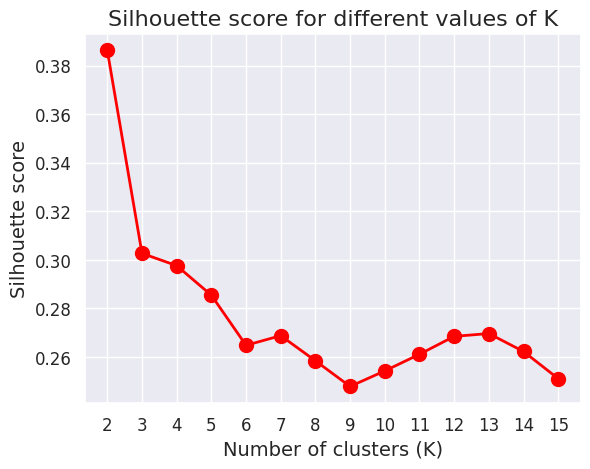

In [115]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Your data
X = X

silhouette_scores = []

# Loop over different values of K
for n_clusters in range(2, 16):
    # Initialize the KMeans model with the number of clusters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++')

    # Fit the KMeans model to the data
    kmeans.fit(X)

    # Predict the cluster labels for each data point
    labels = kmeans.labels_

    # Calculate the silhouette score for this solution
    silhouette = silhouette_score(X, labels)

    # Append the silhouette score to the array
    silhouette_scores.append(silhouette)

    # Print the silhouette score for this solution
    print(f"Silhouette score for {n_clusters} clusters: {silhouette:.3f}")

# Plot the silhouette scores
plt.plot(range(2, 16), silhouette_scores, '-o', color='red', markersize=10, linewidth=2)
plt.xlabel('Number of clusters (K)', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.title('Silhouette score for different values of K', fontsize=16)
plt.xticks(range(2, 16), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

The silhouette score plot is commonly used to evaluate the quality of clustering.

The plot suggests that 2 clusters are optimal for the dataset.

In [116]:
# Instantiate a KMeans object with 2 clusters
kmeans = KMeans(n_clusters=2)

# Fit the input data X to the KMeans model
kmeans.fit(X)

# Predict the cluster labels for the input data X using the trained KMeans model
y_kmeans = kmeans.predict(X)

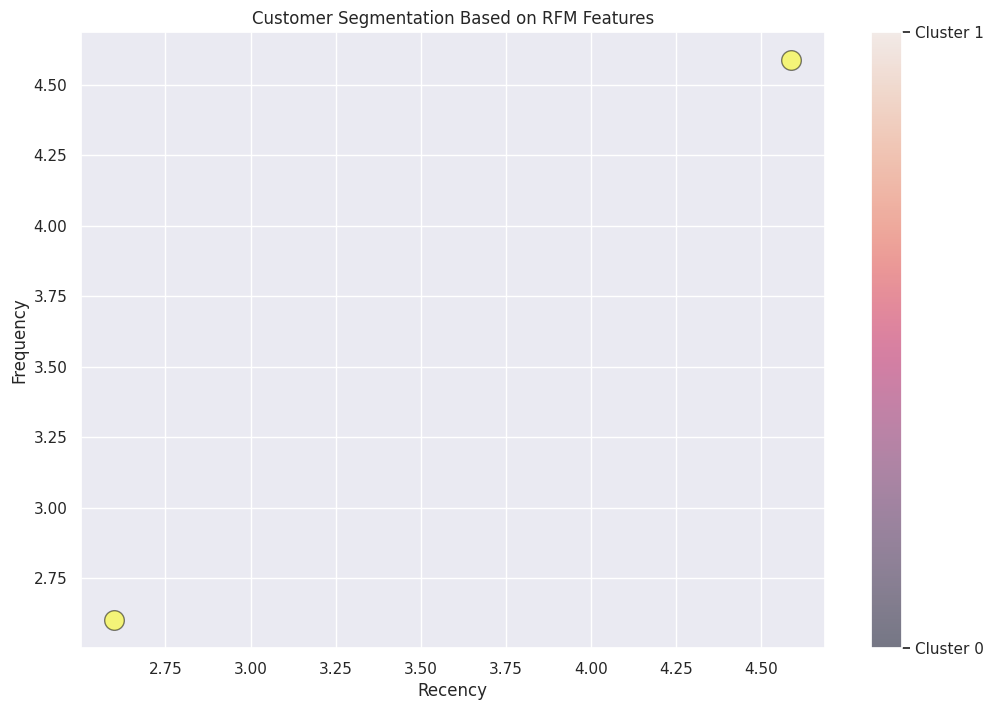

In [131]:

# Visualization of customer segmentation based On RFM features.
# Set the figure size and title for the scatter plot
plt.figure(figsize=(12,8))
plt.title('Customer Segmentation Based on RFM Features')

# Get the cluster centers from the trained KMeans model and plot them as yellow circles with transparency
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 1], c='yellow', s=200, alpha=0.5, edgecolor='black')

# Set the x-axis and y-axis labels
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Add a color bar to the plot to show the correspondence between the colors and the cluster labels
color_bar = plt.colorbar()
color_bar.set_ticks(np.unique(y_kmeans))
color_bar.set_ticklabels(['Cluster {}'.format(i) for i in np.unique(y_kmeans)])

# Show the plot
plt.show()

The scatter plot is commonly used to visualize the distribution of data points in a 2D space. In this case, the scatter plot is used to visualize customer segmentation based on RFM (Recency, Frequency, Monetary) features.

The scatter plot reveals distinct clusters of customers based on their RFM features. This allows businesses to identify groups of customers with similar behavior and tailor their marketing strategies accordingly. The cluster centers (yellow circles) also provide a visual representation of the typical RFM profile of each customer segment.

By enabling businesses to identify and target specific customer segments with personalized marketing strategies and product recommendations. This can lead to improved customer experiences, increased customer loyalty, and ultimately, positive business impact.

### ML Model - 2

# **K-Means with Elbow method**

The elbow method is used to find the optimal number of clusters for KMeans clustering. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters. The elbow point on the plot corresponds to the optimal number of clusters that balances the trade-off between model complexity and data structure.

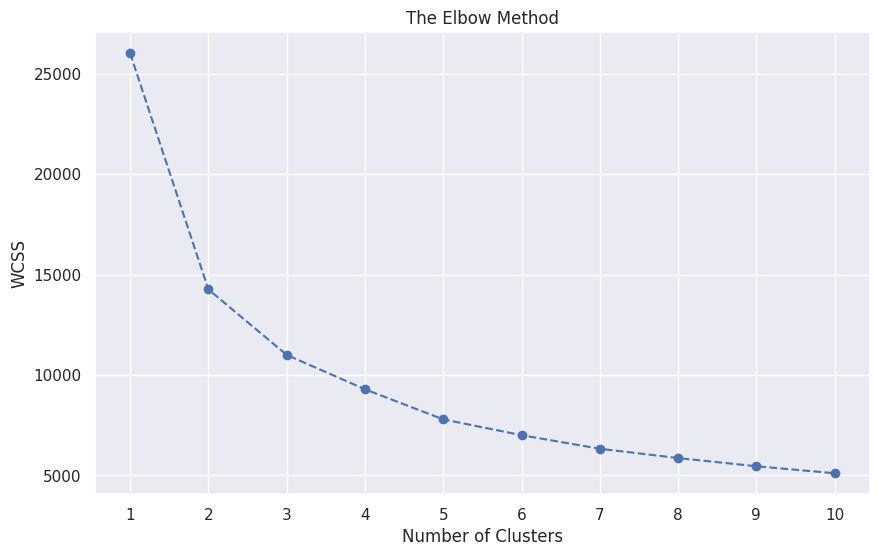

In [132]:
# Input data X

wcss = []  # Initialize an empty list to store the WCSS values for different number of clusters

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)  # Create a KMeans instance for each number of clusters
    kmeans.fit(X)  # Fit the KMeans model to the input data X
    wcss.append(kmeans.inertia_)  # Append the WCSS value to the list for the current number of clusters

# Plot the WCSS values against the number of clusters
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

The Elbow Method plot is commonly used to identify the optimal number of clusters in a K-means clustering algorithm.

In [133]:
# Create an instance of the KMeans model with 2 clusters and initialize the centroids using the 'k-means++' method
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)

# Fit the KMeans model to the data in the X variable
KMean_clust.fit(X)

# Add a new column to the rfm_df dataframe to store the cluster labels for each observation
rfm_df['Cluster'] = KMean_clust.labels_

# Display the first 10 rows of the rfm_df dataframe with the new 'Cluster' column
rfm_df.head(10)

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Cluster
0,12346.0,325,1,74215,1,1,4,114,0
1,12347.0,2,182,2458,4,4,4,444,1
2,12348.0,75,31,2341,2,2,4,224,1
3,12349.0,18,73,631,3,3,3,333,1
4,12350.0,310,17,197,1,1,2,112,0
5,12352.0,36,85,536,3,3,3,333,1
6,12353.0,204,4,20,1,1,1,111,0
7,12354.0,232,58,530,1,3,3,133,0
8,12355.0,214,13,240,1,1,2,112,0
9,12356.0,22,59,1591,3,3,4,334,1


## **3. Agglomerative Hierarchial Clustering**

Agglomerative Hierarchical Clustering is a clustering algorithm that starts with each data point in its own cluster, and then merges the two closest clusters until only one remains, producing a tree-like structure. Different distance metrics and linkage criteria can be used to determine proximity between clusters. It is a popular and effective method for exploratory data analysis.

In [134]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering with 2 clusters, euclidean affinity, and ward linkage
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Fit the input data X to the model
model.fit(X)


AgglomerativeClustering(affinity='euclidean')

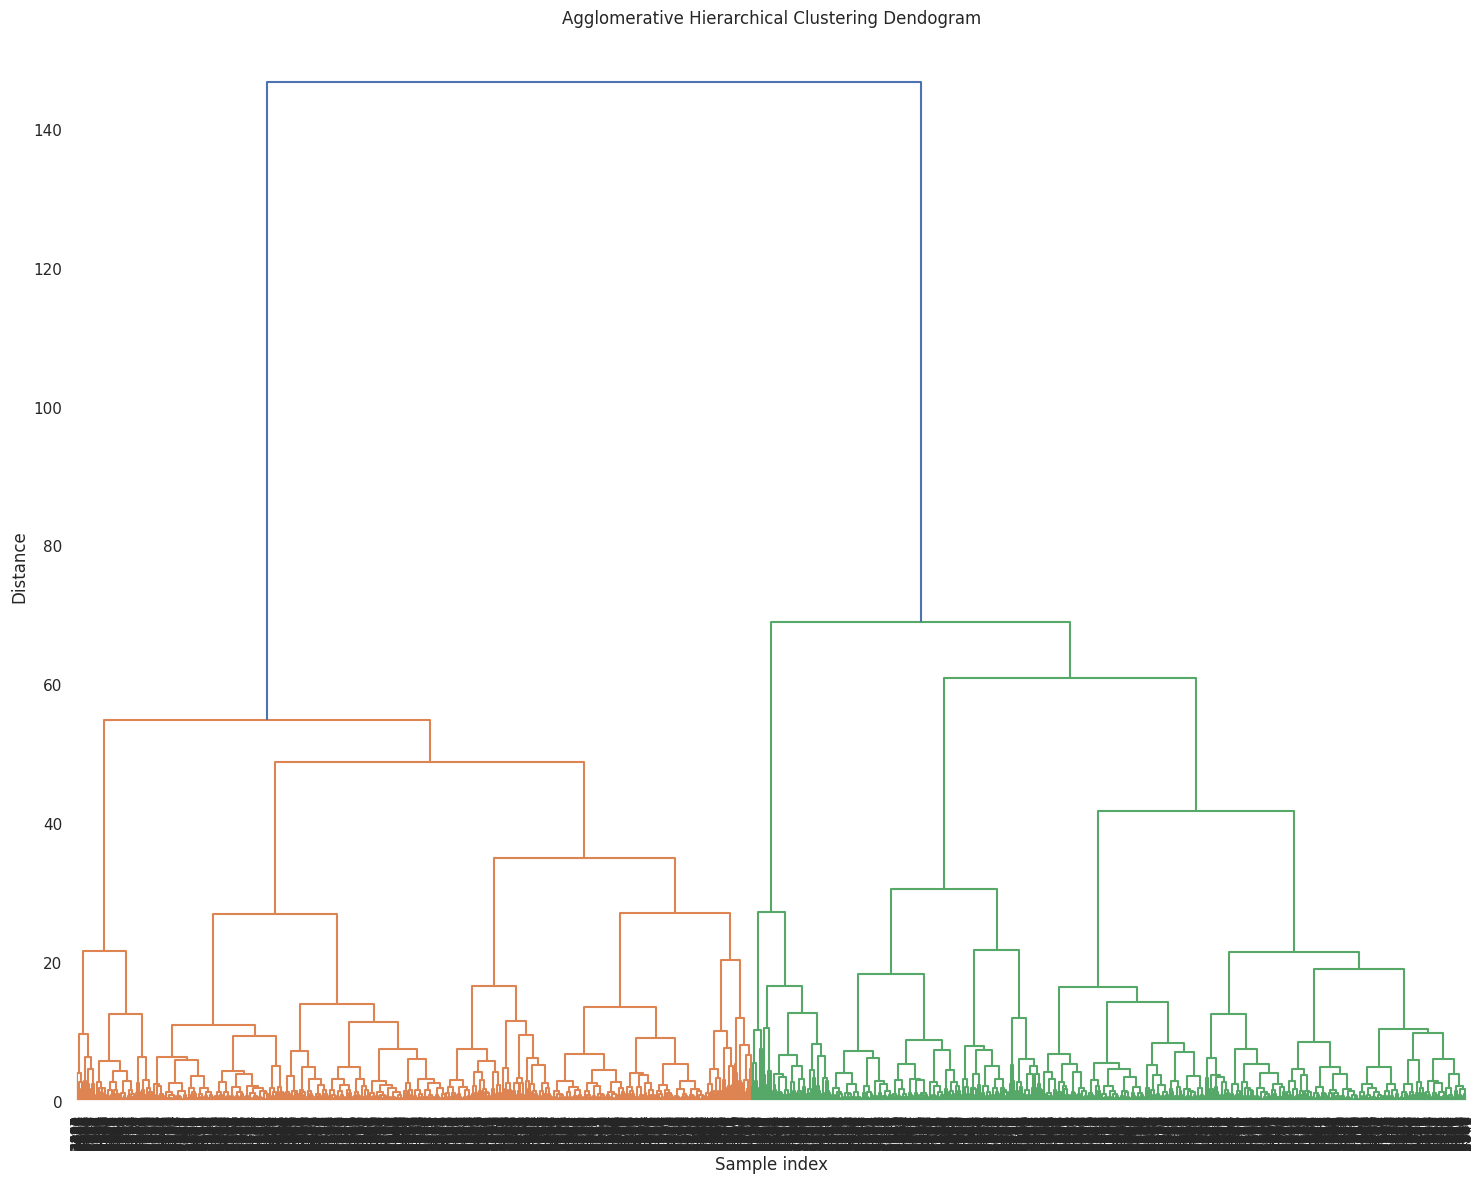

In [135]:
# Import necessary libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Set the figure size and title for the dendrogram plot
plt.figure(figsize=(15, 12))
plt.title('Agglomerative Hierarchical Clustering Dendogram')

# Set the x and y-axis labels for the dendrogram plot
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Create a linkage matrix using the input data X and the ward linkage method
Z = linkage(X, 'ward')

# Plot the dendrogram with specified parameters
dendrogram(Z, leaf_rotation=90.0, p=25, color_threshold=80, leaf_font_size=10, truncate_mode='level')

# Ensure tight layout of the plot
plt.tight_layout()


I picked a dendrogram plot because it is a common way to visualize the results of hierarchical clustering, which is the clustering method used in this case.

The dendrogram plot shows how the data points are clustered based on their distance to each other. It helps identify the optimal number of clusters and the hierarchical structure of the clusters.

The insights gained from the dendrogram plot can help identify the optimal number of clusters and determine which observations or clusters are most similar to each other. This information can be used to create more targeted marketing or sales strategies and improve overall business performance.

# **3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular unsupervised machine learning algorithm used for clustering or grouping data points based on their density. It is a density-based clustering method that aims to discover clusters of arbitrary shape and size.*

In [ ]:
# Fitting DBSCAN clusterer
dbsc = DBSCAN(eps=0.2, min_samples=25)                                # Initializing the model
y = dbsc.fit_predict(X)                                               # Fitting the model

# Plotting Clusters for Visualization
title = 'DBSCAN Clustering'                                           # Setting the title
segment_name = 'DBSCAN'
overlap_supress = 0.2
color="YlGnBu"

# **Summaery Table**

In [150]:
# Import necessary libraries
from prettytable import PrettyTable

# Initialize the table with specified column names
myTable = PrettyTable(['SL No.', "Model_Name", 'Data', "Optimal_Number_of_cluster"])

# Add rows to the table
myTable.add_row(['1', "K-Means with silhouette_score", "RFM", "2"])
myTable.add_row(['2', "K-Means with Elbow method", "RFM", "2"])
myTable.add_row(['3', "Hierarchical clustering", "RFM", "2"])
myTable.add_row(['4',"DBSCAN ", "RFM", "3"])

# Print the table
print(myTable)

+--------+-------------------------------+------+---------------------------+
| SL No. |           Model_Name          | Data | Optimal_Number_of_cluster |
+--------+-------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score | RFM  |             2             |
|   2    |   K-Means with Elbow method   | RFM  |             2             |
|   3    |    Hierarchical clustering    | RFM  |             2             |
|   4    |            DBSCAN             | RFM  |             3             |
+--------+-------------------------------+------+---------------------------+


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. We started with a simple binning and quantile based simple segmentation model first then moved to more complex models because simple implementation helps having a first glance at the data and know where/how to exploit it better.
2. Then we moved to k-means clustering and visualized the results with different number of clusters. As we know there is no assurance that k-means will lead to the global best solution. We moved forward and tried Hierarchical Clustering and DBSCAN clusterer as well.
3. We created several useful clusters of customers on the basis of different metrics and methods to cateorize the customers on the basis of their beavioural attributes to define their valuability, loyality, profitability etc for the business. Though significantly separated clusters are not visible in the plots, but the clusters obtained is fairly valid and useful as per the algorithms and the statistics extracted from the data

4.Null values and duplicates were removed from the dataset before applying clustering.

5. Top customer IDs were found to be 17841.0, 14911.0, 14096.0, 12748.0, and 14606.0.

6 .The top five countries based on the percentage of total orders were the United Kingdom (88.95%), Germany (2.33%), France (1.84%), Ireland (1.84%), and Spain (0.62%).

7. The top five products purchased based on frequency were White Hanging Heart 8. T-Light Holder, Regency Cakestand 3 Tier, Jumbo Bag Red Retrospot, Party Bunting, and Assorted Colour Bird Ornament.

9.The top stock codes based on count values were 85123A, 22423, 85099B, 47566, and 84879.

10. New columns were created using InvoiceDate, such as Year, Month, Day, Hour, Month_Num, and Day_Num.



# 2. Algorithm
RFM (Recency, Frequency, and Monetary) dataframe helps in solving problems in a particular order, making it easy to recommend and display new products to selected customers.

Different clustering algorithms were applied to the dataset, including: Clustering on Recency, Frequency & Monetary (RFM) with 2 clusters.

K-Means with Silhouette_score
K-Means with Elbow Method
Hierarchical Clustering
DBSCAN
Thank you!

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***